# TASK 1: Data Quality Assessment

### Import the Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt 
from plotnine import *
%matplotlib inline
import seaborn as sns

## Load the Dataset

---





1.   Transactions Data set


In [ ]:
Transactions = pd.read_excel('https://s3-ap-southeast-2.amazonaws.com/insidesherpa-assets/vinternship_modules/kpmg_data_analytics/KPMG_VI_New_raw_data_update_final.xlsx', 
                             sheet_name = 'Transactions', header = 1, skiprows = 0)

A peak into the Transaction Data. 

In [ ]:
Transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [ ]:
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

The data seems to have some 
abnormality. Those are,

1.   The column 'product_first_sold_date' is in float format instead of being in Date format.
2.   The data also seems to have a lot of missing entries.

Converting column 'product_first_sold_date' from float to date fomat.

(using 01/01/1900 as the origin since it is the orgin date using by Microsoft Excel)



*   Source [Microsoft Support](https://support.microsoft.com/en-us/office/date-systems-in-excel-e7fe7167-48a9-4b96-bb53-5612a800b487)


In [ ]:
Transactions['product_first_sold_date'] = pd.TimedeltaIndex(Transactions['product_first_sold_date'], unit = 'd') + dt.datetime(1900,1,1)


Removing all Na entries. 

In [ ]:
Transactions.dropna(axis = 0, how = 'any', inplace= True)

In [ ]:
Transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-04
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-05
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-22
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-18
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-12




2.   New Customer List



In [ ]:
NewCustomerList = pd.read_excel('https://s3-ap-southeast-2.amazonaws.com/insidesherpa-assets/vinternship_modules/kpmg_data_analytics/KPMG_VI_New_raw_data_update_final.xlsx', 
                                sheet_name = 'NewCustomerList', header = 1, skiprows= 0)

A sneak peak into NewCustomerList Data set. 

In [ ]:
NewCustomerList.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,0.56,0.7000,0.8750,0.743750,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,0.89,0.8900,1.1125,0.945625,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1.01,1.0100,1.0100,1.010000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,0.87,1.0875,1.0875,1.087500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,0.52,0.5200,0.6500,0.650000,4,4,1.703125


In [ ]:
NewCustomerList.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

The Data seems to have a number of abnormality. Those are,

1.   Seems to have five columns, which have column names, 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamaed: 19', 'Unnamed: 20'. And these columns seems to carry no real meaning, hence these could be dropped from further analysis.

2.   The Date of Birth ('DOB') column could be manipluated to get Age column, which could provide a better base as compared to DOB column for further analysis.

3. The dataset also seems to have NA values. 




Removing unnecessary columns. 

In [ ]:
NewCustomerList.drop(['Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20'], axis=1, inplace=True)

Removing all NA values

In [ ]:
NewCustomerList.dropna(axis = 0, how = 'any', inplace= True)

Creating a new column named Age', which uses DOB column to calulate the age of the customer. 

In [ ]:
NewCustomerList.insert(loc= 6, column= 'Age', value=0)
Today = dt.datetime.today().year
NewCustomerList['Age'] = Today - NewCustomerList.DOB.dt.year

In [ ]:
NewCustomerList.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,Age,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,64,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,51,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,47,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,42,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,56,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125




3.   Customer Demographic



In [ ]:
CustomerDemographic = pd.read_excel('https://s3-ap-southeast-2.amazonaws.com/insidesherpa-assets/vinternship_modules/kpmg_data_analytics/KPMG_VI_New_raw_data_update_final.xlsx',
                                    sheet_name = 'CustomerDemographic', header = 1, skiprows = 0)

A sneak peak into customer demographic data

In [ ]:
CustomerDemographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [ ]:
CustomerDemographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

The CustomerDemographic seems to have a number of abnormalities, like

1. The column 'default' has some weird entries, failing to signify any real meaning to the data

2. The data also has irregular entries in 'gender' column, like (Femal), hence, assuming that female ~ Female, F ~ Female and also assuming gender entry 'U' to be 'Unknown'. 
3. Just like the previous dataset, the CustomerDemographic also has 'DOB' column, so, we would interested in creating 'Age' column.
4. The data does incorpate NA entries. 

Remove the 'default' column. 

In [ ]:
CustomerDemographic.drop(['default'], axis = 1, inplace=True)

Remove NA entries. 

In [ ]:
CustomerDemographic.dropna(axis = 0, how = 'any', inplace= True)

A Look into entries in 'gender' column. 

Fixing the irregular entries from 'gender' column. 

In [ ]:
CustomerDemographic.replace({'gender':{'F' : 'Female', 'Femal' : 'Female', 'U' : 'Unknown', 'M' : 'Male'}}, inplace = True)

In [ ]:
set(CustomerDemographic['gender'])

{'Female', 'Male', 'Unknown'}

Creating a new 'AGE' column using (DOB) column. 

In [ ]:
CustomerDemographic.insert(loc= 6, column= 'Age', value=0)

In [ ]:
Today = dt.datetime.today().year
CustomerDemographic['Age'] = Today - CustomerDemographic.DOB.dt.year

In [ ]:
set(CustomerDemographic.Age)

{19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 77,
 78,
 86,
 90,
 178}

In [ ]:
#the age column seems to have a value 178, hence discarding the wrong or an outlier entry. 

CustomerDemographic = CustomerDemographic[CustomerDemographic.Age != 178] 

In [ ]:
CustomerDemographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,Age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,Female,93,1953-10-12,68,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,41,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,67,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
8,9,Mala,Lind,Female,97,1973-03-10,48,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,8.0
9,10,Fiorenze,Birdall,Female,49,1988-10-11,33,Senior Quality Engineer,Financial Services,Mass Customer,N,Yes,20.0




4.   Customer Address



In [ ]:
CustomerAddress = pd.read_excel('https://s3-ap-southeast-2.amazonaws.com/insidesherpa-assets/vinternship_modules/kpmg_data_analytics/KPMG_VI_New_raw_data_update_final.xlsx',
                                sheet_name = "CustomerAddress", header = 1, skiprows = 0)

A sneak peak into CustomerAddress dataset. 

In [ ]:
CustomerAddress.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [ ]:
CustomerAddress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


The CustomerAddress dataset looks at the location of a customer. 

The data seems to have a small abnormality, the 'state' column has some ununiform entries, and also a number of NA entries. 

Removing NA entries. 

In [ ]:
CustomerAddress.dropna(axis = 0, how = 'any', inplace= True)

The state column seems to have some ununiform entries.

In [ ]:
set(CustomerAddress['state'])

{'NSW', 'New South Wales', 'QLD', 'VIC', 'Victoria'}

In [ ]:
CustomerAddress.replace({'state' : {'NSW' : 'New South Wales', 'VIC': 'Victoria', 'QLD':'Queensland'}}, inplace= True) #making entries uniform!

In [ ]:
CustomerAddress.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,Queensland,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,Victoria,Australia,9


## Merge the datasets

Merge three datasets, 'Transaction', 'CustomerAddress' and 'CustomerDemographic' into 'Data' inorder to do further comprehend customer attributes. 

In [ ]:
Data1 = Transactions.merge(CustomerDemographic, on = 'customer_id')

In [ ]:
Data1.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,Age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-04,Kristos,Anthony,Male,19,1955-01-11,66,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,1403.50,954.82,2003-02-09,Kristos,Anthony,Male,19,1955-01-11,66,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,478.16,298.72,2010-11-07,Kristos,Anthony,Male,19,1955-01-11,66,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-05,Lauree,O'Donnell,Female,89,1979-02-04,42,Clinical Specialist,Health,Mass Customer,N,Yes,10.0
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,1129.13,677.48,2011-04-18,Lauree,O'Donnell,Female,89,1979-02-04,42,Clinical Specialist,Health,Mass Customer,N,Yes,10.0


In [ ]:
Data = Data1.merge(CustomerAddress, on = 'customer_id')

In [ ]:
Data.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,Age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-04,Kristos,Anthony,Male,19,1955-01-11,66,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,984 Hoepker Court,3064,Victoria,Australia,6
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,1403.50,954.82,2003-02-09,Kristos,Anthony,Male,19,1955-01-11,66,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,984 Hoepker Court,3064,Victoria,Australia,6
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,478.16,298.72,2010-11-07,Kristos,Anthony,Male,19,1955-01-11,66,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,984 Hoepker Court,3064,Victoria,Australia,6
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-05,Lauree,O'Donnell,Female,89,1979-02-04,42,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,4 Shopko Circle,2196,New South Wales,Australia,5
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,1129.13,677.48,2011-04-18,Lauree,O'Donnell,Female,89,1979-02-04,42,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,4 Shopko Circle,2196,New South Wales,Australia,5


In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13628 entries, 0 to 13627
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       13628 non-null  int64         
 1   product_id                           13628 non-null  int64         
 2   customer_id                          13628 non-null  int64         
 3   transaction_date                     13628 non-null  datetime64[ns]
 4   online_order                         13628 non-null  float64       
 5   order_status                         13628 non-null  object        
 6   brand                                13628 non-null  object        
 7   product_line                         13628 non-null  object        
 8   product_class                        13628 non-null  object        
 9   product_size                         13628 non-null  object        
 10  list_price

In [ ]:
Data.to_excel('Final_Data.xlsx', sheet_name = 'Merged_Data')

In [ ]:
Data.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,past_3_years_bike_related_purchases,Age,tenure,postcode,property_valuation
count,13628.000000,13628.000000,13628.000000,13628.000000,13628.000000,13628.000000,13628.000000,13628.000000,13628.000000,13628.000000,13628.000000
mean,10005.906810,45.600602,1715.722483,0.499560,1110.136508,557.915940,49.495451,43.800925,10.739287,2998.708174,7.474391
std,5768.982289,30.496613,1010.437800,0.500018,584.296826,408.559282,28.599635,12.535210,5.669325,859.520660,2.843436
min,1.000000,0.000000,1.000000,0.000000,12.010000,7.210000,0.000000,19.000000,1.000000,2000.000000,1.000000
25%,5035.750000,18.000000,829.000000,0.000000,575.270000,215.140000,25.000000,34.000000,6.000000,2197.000000,6.000000
50%,9999.500000,44.000000,1715.500000,0.000000,1163.890000,507.580000,48.000000,44.000000,11.000000,2768.000000,8.000000
75%,14989.250000,72.000000,2583.000000,1.000000,1635.300000,795.100000,74.000000,53.000000,16.000000,3796.750000,10.000000
max,20000.000000,100.000000,3497.000000,1.000000,2091.470000,1759.850000,99.000000,90.000000,22.000000,4883.000000,12.000000


# Task 2: Data Insights

Load the data from the previous task, (which is saved as Data)

Add a 'Profit' column inorder to calculate motentary value for RFM analysis. 

In [ ]:
Data['Profit'] = Data['list_price'] - Data['standard_cost']

In [ ]:
max(Data['transaction_date'])

Timestamp('2017-12-30 00:00:00')

In [ ]:
Data["Recency"] = (max(Data['transaction_date']) - Data['transaction_date']).dt.days

In [ ]:
Data['Recency'].describe()

count    13628.000000
mean       181.392941
std        105.577367
min          0.000000
25%         88.000000
50%        181.000000
75%        273.000000
max        363.000000
Name: Recency, dtype: float64

In [ ]:
Data.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,Age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Profit,Recency
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-04,Kristos,Anthony,Male,19,1955-01-11,66,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,984 Hoepker Court,3064,Victoria,Australia,6,17.87,308
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,1403.50,954.82,2003-02-09,Kristos,Anthony,Male,19,1955-01-11,66,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,984 Hoepker Court,3064,Victoria,Australia,6,448.68,75
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,478.16,298.72,2010-11-07,Kristos,Anthony,Male,19,1955-01-11,66,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,984 Hoepker Court,3064,Victoria,Australia,6,179.44,248
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-05,Lauree,O'Donnell,Female,89,1979-02-04,42,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,4 Shopko Circle,2196,New South Wales,Australia,5,1702.55,223
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,1129.13,677.48,2011-04-18,Lauree,O'Donnell,Female,89,1979-02-04,42,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,4 Shopko Circle,2196,New South Wales,Australia,5,451.65,86


In [ ]:
R_min = Data.groupby('customer_id')['Recency'].agg('min')

In [ ]:
R_min.head()

customer_id
1       7
2     128
9      78
12     67
13     27
Name: Recency, dtype: int64

In [ ]:
Count_prod = Data.groupby('customer_id')['product_id'].agg('count')

In [ ]:
Count_prod.head()

customer_id
1     11
2      3
9      6
12     7
13     7
Name: product_id, dtype: int64

In [ ]:
Profit_sum = Data.groupby('customer_id')['Profit'].agg('sum')

In [ ]:
Profit_sum.head()

customer_id
1     3018.09
2     2226.26
9     2353.11
12    3540.03
13    4337.38
Name: Profit, dtype: float64

In [ ]:
RFM_Score = pd.concat([R_min, Count_prod, Profit_sum], axis= 1 )

In [ ]:
type(RFM_Score)

pandas.core.frame.DataFrame

In [ ]:
RFM_Score.describe()

,Recency,product_id,Profit
count,2446.000000,2446.000000,2446.000000
mean,62.396975,5.571545,3076.721954
std,59.661607,2.273433,1770.324635
min,0.000000,1.000000,15.080000
25%,18.000000,4.000000,1796.072500
50%,44.000000,5.000000,2795.780000
75%,87.000000,7.000000,4095.417500
max,353.000000,14.000000,11668.950000


In [ ]:
RFM_Score['Recency'].quantile(0.15)

10.0

In [ ]:
RFM_Score.quantile(0.85, numeric_only= False)

Recency        122.00
product_id       8.00
Profit        4906.92
Name: 0.85, dtype: float64

In [ ]:
RFM_Score.loc[RFM_Score['Recency'] < 354, 'R_Score'] = 1
RFM_Score.loc[RFM_Score['Recency'] < 87, 'R_Score'] = 2
RFM_Score.loc[RFM_Score['Recency'] < 44, 'R_Score'] = 3
RFM_Score.loc[RFM_Score['Recency'] < 18, 'R_Score'] = 4
RFM_Score.loc[RFM_Score['Recency'] < 10, 'R_Score'] = 5

In [ ]:
RFM_Score.loc[RFM_Score['product_id'] > 0.99, 'F_Score'] = 1
RFM_Score.loc[RFM_Score['product_id'] > 4, 'F_Score'] = 2
RFM_Score.loc[RFM_Score['product_id'] > 5, 'F_Score'] = 3
RFM_Score.loc[RFM_Score['product_id'] > 7, 'F_Score'] = 4
RFM_Score.loc[RFM_Score['product_id'] > 8, 'F_Score'] = 5

In [ ]:
RFM_Score.loc[RFM_Score['Profit'] > 15.08, 'M_Score'] = 1
RFM_Score.loc[RFM_Score['Profit'] > 1796.09, 'M_Score'] = 2
RFM_Score.loc[RFM_Score['Profit'] > 2795.78, 'M_Score'] = 3
RFM_Score.loc[RFM_Score['Profit'] > 4513.06, 'M_Score'] = 4
RFM_Score.loc[RFM_Score['Profit'] > 4906.92, 'M_Score'] = 5

In [ ]:
RFM_Score['RFM_Value'] = ((RFM_Score['R_Score'] + RFM_Score['F_Score'] + RFM_Score['M_Score'])/3).astype("float64")

In [ ]:
RFM_Score.describe()

,Recency,product_id,Profit,R_Score,F_Score,M_Score,RFM_Value
count,2446.000000,2446.000000,2446.000000,2446.000000,2446.000000,2446.000000,2446.000000
mean,62.396975,5.571545,3076.721954,2.625920,2.441128,2.599755,2.555601
std,59.661607,2.273433,1770.324635,1.338546,1.323227,1.319534,1.017266
min,0.000000,1.000000,15.080000,1.000000,1.000000,1.000000,1.000000
25%,18.000000,4.000000,1796.072500,1.000000,1.000000,1.250000,1.666667
50%,44.000000,5.000000,2795.780000,2.000000,2.000000,2.500000,2.666667
75%,87.000000,7.000000,4095.417500,3.000000,3.000000,3.000000,3.333333
max,353.000000,14.000000,11668.950000,5.000000,5.000000,5.000000,5.000000


In [ ]:
RFM_Score.RFM_Value.quantile(0.85)

3.6666666666666665

In [ ]:
RFM_Score.loc[RFM_Score['RFM_Value'] > 1, 'Customer_Title'] = "Can't lose them!!" 
RFM_Score.loc[RFM_Score['RFM_Value'] > 1.667, 'Customer_Title'] = "At risk of losing"
RFM_Score.loc[RFM_Score['RFM_Value'] > 2.667, 'Customer_Title'] = "Probably New Customer"
RFM_Score.loc[RFM_Score['RFM_Value'] > 3.333, 'Customer_Title'] = "Possible Loyal"
RFM_Score.loc[RFM_Score['RFM_Value'] > 3.665, 'Customer_Title'] = "Champion"

In [ ]:
RFM_Score.head()

,Recency,product_id,Profit,R_Score,F_Score,M_Score,RFM_Value,Customer_Title
customer_id,,,,,,,,
1,7,11,3018.09,5.0,5.0,3.0,4.333333,Champion
2,128,3,2226.26,1.0,1.0,2.0,1.333333,Can't lose them!!
9,78,6,2353.11,2.0,3.0,2.0,2.333333,At risk of losing
12,67,7,3540.03,2.0,3.0,3.0,2.666667,At risk of losing
13,27,7,4337.38,3.0,3.0,3.0,3.000000,Probably New Customer


In [ ]:
RFM_Score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2446 entries, 1 to 3497
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Recency         2446 non-null   int64  
 1   product_id      2446 non-null   int64  
 2   Profit          2446 non-null   float64
 3   R_Score         2446 non-null   float64
 4   F_Score         2446 non-null   float64
 5   M_Score         2446 non-null   float64
 6   RFM_Value       2446 non-null   float64
 7   Customer_Title  2224 non-null   object 
dtypes: float64(5), int64(2), object(1)
memory usage: 172.0+ KB


Text(0.5, 1.0, 'Number of Customer from Each Customer Group')

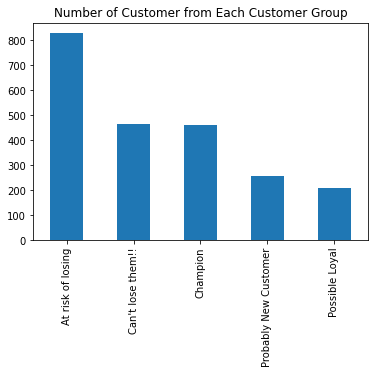

In [ ]:
RFM_Score.Customer_Title.value_counts().plot(kind= 'bar')
plt.title('Number of Customer from Each Customer Group')

In [ ]:
np.intersect1d(Data.columns, NewCustomerList.columns)

array(['Age', 'DOB', 'address', 'country', 'deceased_indicator',
       'first_name', 'gender', 'job_industry_category', 'job_title',
       'last_name', 'owns_car', 'past_3_years_bike_related_purchases',
       'postcode', 'property_valuation', 'state', 'tenure',
       'wealth_segment'], dtype=object)

In [ ]:
RFM_Score.shape

(2446, 8)

In [ ]:
Data_w_Cust_info = Data.drop_duplicates(subset= ['customer_id'])

In [ ]:
Data_w_Cstmr_info = Data_w_Cust_info[['customer_id','Age', 'wealth_segment','gender', 'job_industry_category', 'owns_car','state', 'past_3_years_bike_related_purchases','property_valuation']]

In [ ]:
Data_w_Cstmr_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2446 entries, 0 to 13624
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   customer_id                          2446 non-null   int64 
 1   Age                                  2446 non-null   int64 
 2   wealth_segment                       2446 non-null   object
 3   gender                               2446 non-null   object
 4   job_industry_category                2446 non-null   object
 5   owns_car                             2446 non-null   object
 6   state                                2446 non-null   object
 7   past_3_years_bike_related_purchases  2446 non-null   int64 
 8   property_valuation                   2446 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 191.1+ KB


In [ ]:
Final_Data = pd.merge(RFM_Score, Data_w_Cstmr_info, on= 'customer_id')

In [ ]:
Final_Data.head()

,customer_id,Recency,product_id,Profit,R_Score,F_Score,M_Score,RFM_Value,Customer_Title,Age,wealth_segment,gender,job_industry_category,owns_car,state,past_3_years_bike_related_purchases,property_valuation
0,1,7,11,3018.09,5.0,5.0,3.0,4.333333,Champion,68,Mass Customer,Female,Health,Yes,New South Wales,93,10
1,2,128,3,2226.26,1.0,1.0,2.0,1.333333,Can't lose them!!,41,Mass Customer,Male,Financial Services,Yes,New South Wales,81,10
2,9,78,6,2353.11,2.0,3.0,2.0,2.333333,At risk of losing,48,Affluent Customer,Female,Argiculture,Yes,New South Wales,97,12
3,12,67,7,3540.03,2.0,3.0,3.0,2.666667,At risk of losing,27,Mass Customer,Male,Manufacturing,No,Queensland,58,4
4,13,27,7,4337.38,3.0,3.0,3.0,3.000000,Probably New Customer,66,High Net Worth,Male,Financial Services,Yes,Victoria,38,6


In [ ]:
type(Final_Data)

pandas.core.frame.DataFrame

In [ ]:
Final_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2446 entries, 0 to 2445
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          2446 non-null   int64  
 1   Recency                              2446 non-null   int64  
 2   product_id                           2446 non-null   int64  
 3   Profit                               2446 non-null   float64
 4   R_Score                              2446 non-null   float64
 5   F_Score                              2446 non-null   float64
 6   M_Score                              2446 non-null   float64
 7   RFM_Value                            2446 non-null   float64
 8   Customer_Title                       2224 non-null   object 
 9   Age                                  2446 non-null   int64  
 10  wealth_segment                       2446 non-null   object 
 11  gender                        

In [ ]:
Final_Data = Final_Data.dropna()

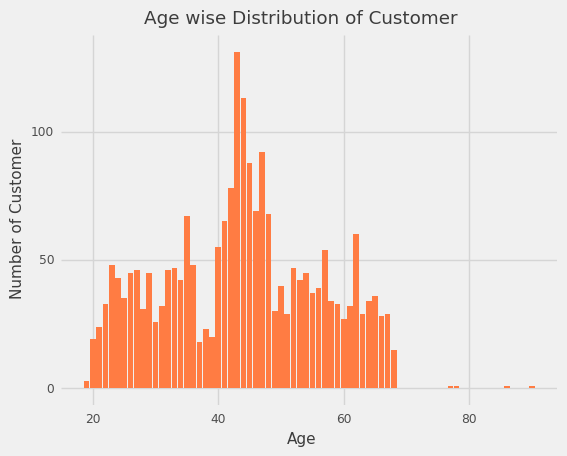

<ggplot: (8760093648872)>

In [ ]:
ggplot(Final_Data, aes(x = 'Age'))+ \
  geom_bar(stat ='count', fill = '#ff7c43')+ \
  labs(x = 'Age', y = 'Number of Customer', title = 'Age wise Distribution of Customer') +\
  theme_538()

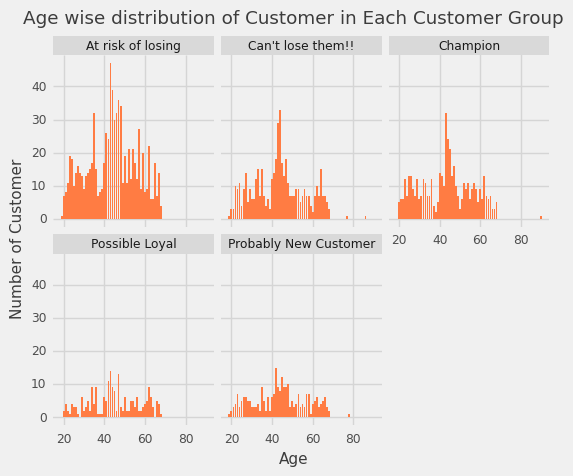

<ggplot: (8760093374433)>

In [ ]:
ggplot(Final_Data, aes(x = 'Age'))+ \
  geom_bar(stat ='count', fill = '#ff7c43')+ \
  facet_wrap('Customer_Title')+\
  labs(x = 'Age', y = 'Number of Customer', title = 'Age wise distribution of Customer in Each Customer Group') +\
  theme_538()

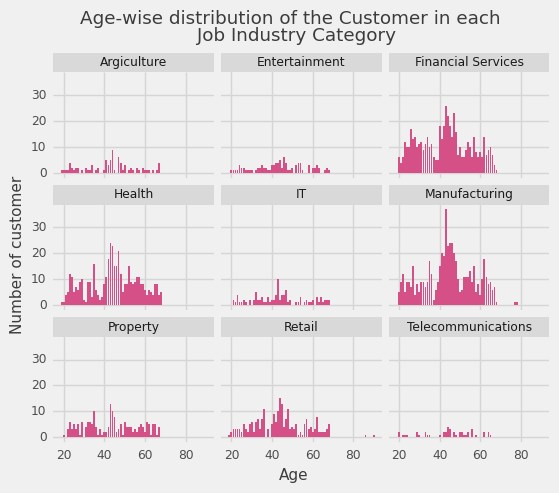

<ggplot: (-9223363276771643918)>

In [ ]:
ggplot(Final_Data, aes(x = 'Age'))+ \
  geom_bar(stat ='count', fill ='#d45087')+ \
  facet_wrap('job_industry_category')+\
  labs(title = 'Age-wise distribution of the Customer in each \n Job Industry Category', x= 'Age', y = 'Number of customer') +\
  theme_538()

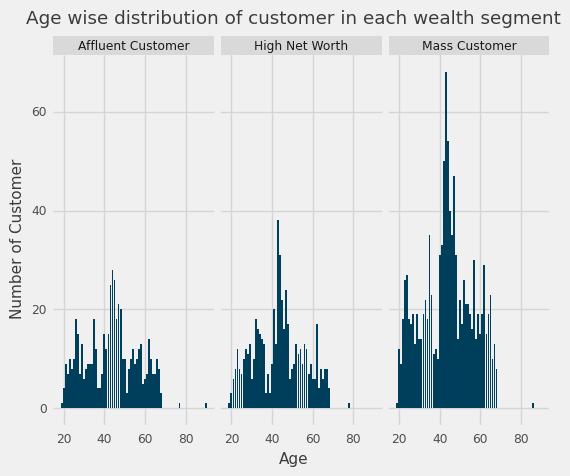

<ggplot: (-9223363276761275055)>

In [ ]:
ggplot(Final_Data, aes(x = 'Age'))+ \
  geom_bar(stat = 'count', fill = '#003f5c')+ \
  facet_wrap('wealth_segment') +\
  labs(x = 'Age', y ='Number of Customer', title = 'Age wise distribution of customer in each wealth segment')+\
  theme_538()

/usr/local/lib/python3.6/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


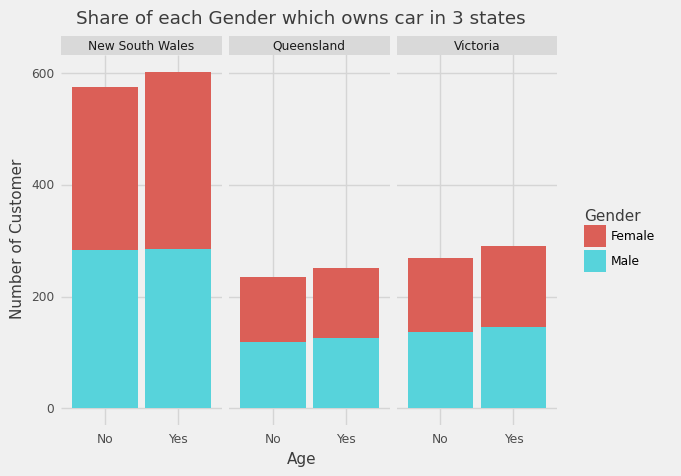

<ggplot: (8760093579805)>

In [ ]:
ggplot(Final_Data, aes(x = 'owns_car', fill = 'gender'))+ \
  geom_bar()+\
  facet_wrap('state')+\
  labs(x = 'Age', y = 'Number of Customer', title ='Share of each Gender which owns car in 3 states')+\
  scale_fill_discrete(name = 'Gender')+\
  theme_538()


In [ ]:
State_profit = Final_Data.groupby('state')['Profit'].agg(sum).to_frame().reset_index()

In [ ]:
State_profit

,state,Profit
0,New South Wales,3855762.49
1,Queensland,1619811.73
2,Victoria,1850875.14


Text(0.5, 1.0, 'Share of Profits from each State')

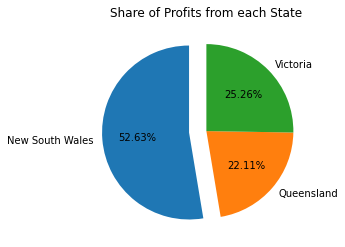

In [ ]:
plt.pie(State_profit.Profit, 
        labels= State_profit.state, 
        explode= [0.2,0,0],autopct='%1.2f%%', 
        startangle= 90)

plt.title('Share of Profits from each State')

/usr/local/lib/python3.6/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


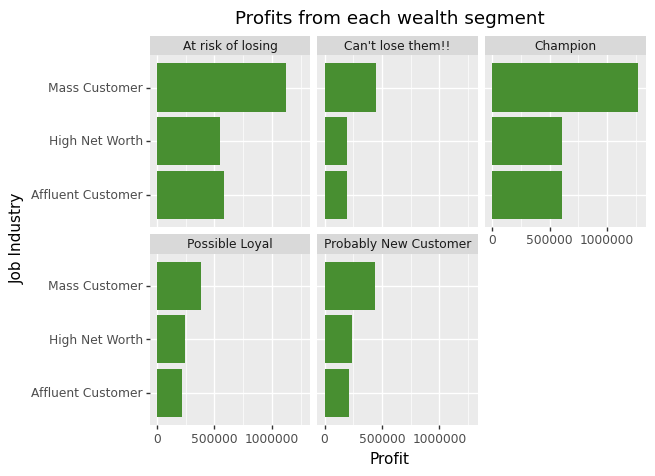

<ggplot: (8760093290451)>

In [ ]:
ggplot(Final_Data, aes(x = 'wealth_segment', y = 'Profit'))+\
    geom_col(stat = 'identity', fill = '#488f31')+\
    labs(x = 'Job Industry', y = 'Profit', title = 'Profits from each wealth segment')+\
    facet_wrap('Customer_Title')+\
    coord_flip()

/usr/local/lib/python3.6/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


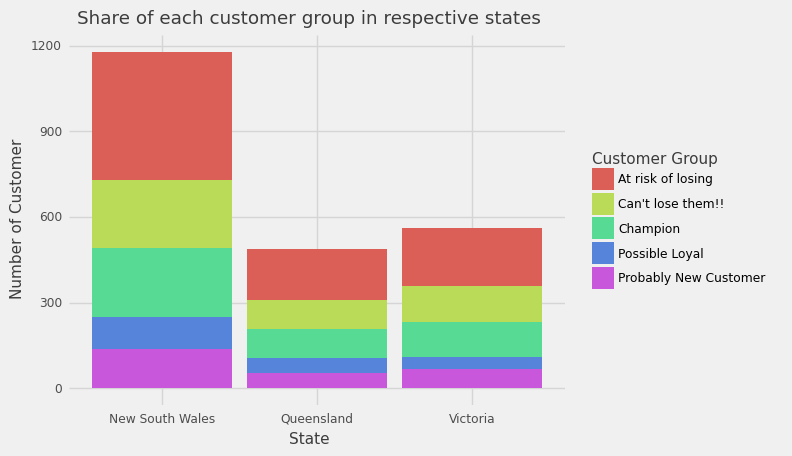

<ggplot: (-9223363276762057528)>

In [ ]:
ggplot(Final_Data, aes(x = 'state', fill = 'Customer_Title'))+ \
  stat_count()+ \
  labs(x = 'State', y = 'Number of Customer', title = 'Share of each customer group in respective states')+\
  scale_fill_discrete(name = 'Customer Group')+\
  theme_538()

/usr/local/lib/python3.6/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


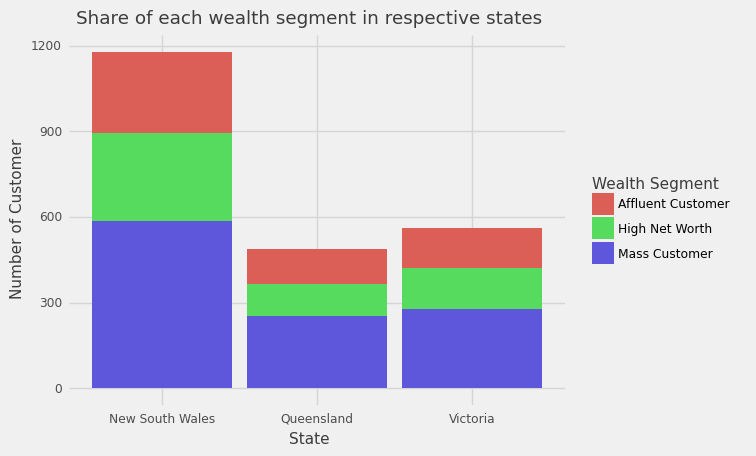

<ggplot: (-9223363276762061273)>

In [ ]:
ggplot(Final_Data, aes(x = 'state', fill = 'wealth_segment'))+ \
  stat_count()+ \
  labs(x = 'State', y = 'Number of Customer', title = 'Share of each wealth segment in respective states')+ \
  scale_fill_discrete(name = 'Wealth Segment')+\
  theme_538()

In [ ]:
customer_title_profit = Final_Data.groupby('Customer_Title')['Profit'].agg(sum).to_frame().reset_index()

In [ ]:
customer_title_profit

,Customer_Title,Profit
0,At risk of losing,2252384.69
1,Can't lose them!!,840234.10
2,Champion,2486139.69
3,Possible Loyal,850625.40
4,Probably New Customer,897065.48


/usr/local/lib/python3.6/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


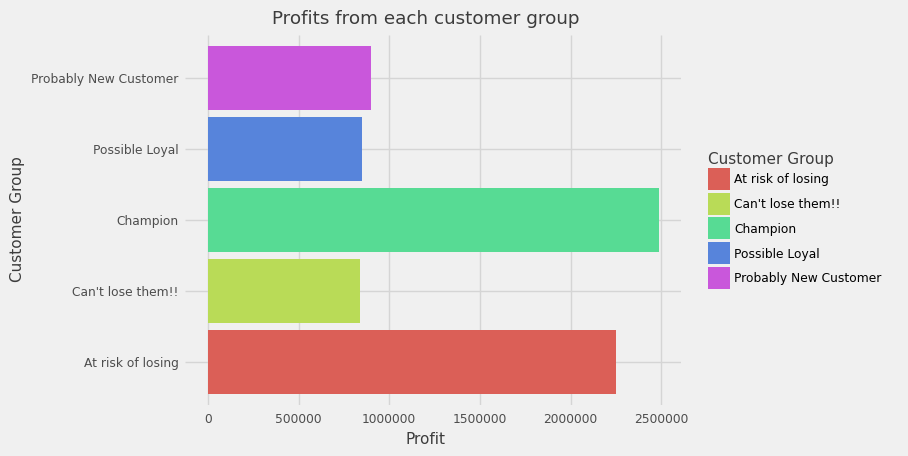

<ggplot: (-9223363276761997708)>

In [ ]:
ggplot(customer_title_profit, aes(x = 'Customer_Title', y = 'Profit', fill = 'Customer_Title'))+ \
  geom_col(stat = 'identity') + \
  theme(legend_position= 'none')+ \
  coord_flip()+ \
  labs(x = 'Customer Group', y = 'Profit', title = 'Profits from each customer group')+\
  scale_fill_discrete(name = 'Customer Group')+\
  theme_538()

/usr/local/lib/python3.6/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


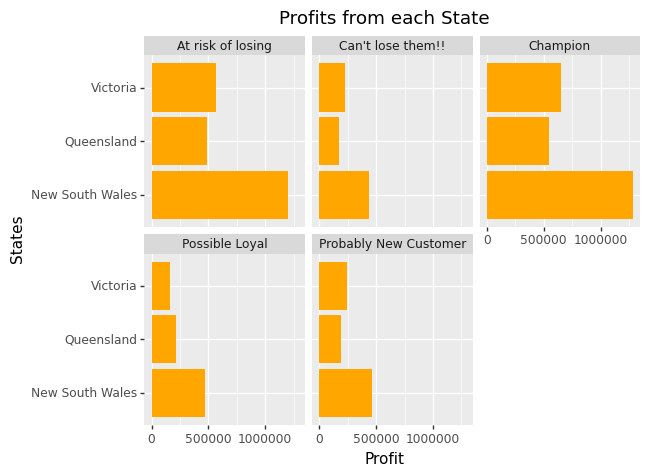

<ggplot: (8760093007992)>

In [ ]:
ggplot(Final_Data, aes(x = 'state', y = 'Profit'))+\
    geom_col(stat = 'identity', fill = '#ffa600')+\
    facet_wrap('Customer_Title')+ \
    labs(x = 'States', y = 'Profit', title = 'Profits from each State')+\
    coord_flip()

/usr/local/lib/python3.6/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


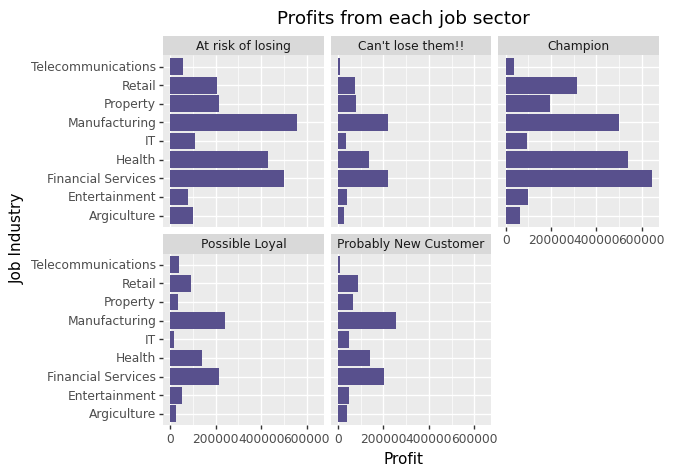

<ggplot: (8760092902436)>

In [ ]:
ggplot(Final_Data, aes(x = 'job_industry_category', y = 'Profit'))+\
    geom_col(stat = 'identity', fill = '#58508d')+\
    facet_wrap('Customer_Title')+\
    labs(x = 'Job Industry', y = 'Profit', title = 'Profits from each job sector')+\
    coord_flip()

In [ ]:
NewCustomerList.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,Age,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,64,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,51,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,47,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,42,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,56,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125


Look into New Customer list

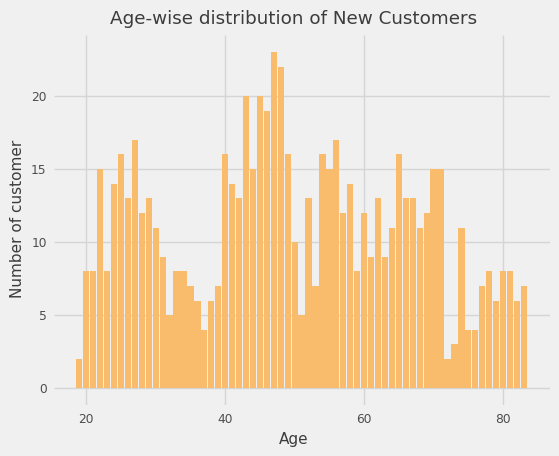

<ggplot: (8760092968438)>

In [ ]:
ggplot(NewCustomerList, aes(x = 'Age'))+ \
  geom_bar(stat = 'count', fill = '#f8bc6c')+ \
  labs(x ='Age', y ='Number of customer', title = 'Age-wise distribution of New Customers')+ \
  theme_538()

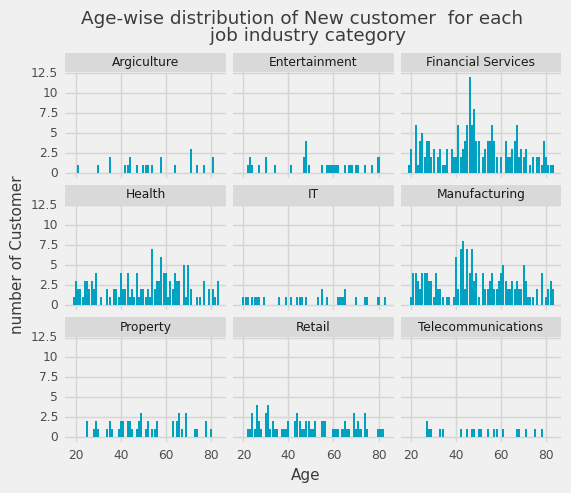

<ggplot: (-9223363276761643653)>

In [ ]:
ggplot(NewCustomerList, aes(x = 'Age')) +\
  geom_bar(stat ='count', fill = '#00a1c1')+ \
  facet_wrap('job_industry_category')+ \
  labs(x = 'Age', y ='number of Customer', title = 'Age-wise distribution of New customer  for each \n job industry category')+\
  theme_538()

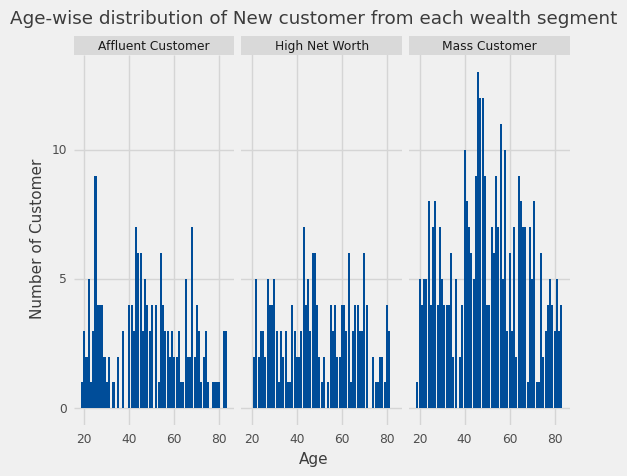

<ggplot: (-9223363276771689335)>

In [ ]:
ggplot(NewCustomerList, aes(x = 'Age'))+ \
  geom_bar(stat = 'count', fill = '#004d99')+ \
  facet_wrap('wealth_segment')+ \
  labs(x = 'Age', y = 'Number of Customer', title = 'Age-wise distribution of New customer from each wealth segment')+\
  theme_538()

/usr/local/lib/python3.6/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


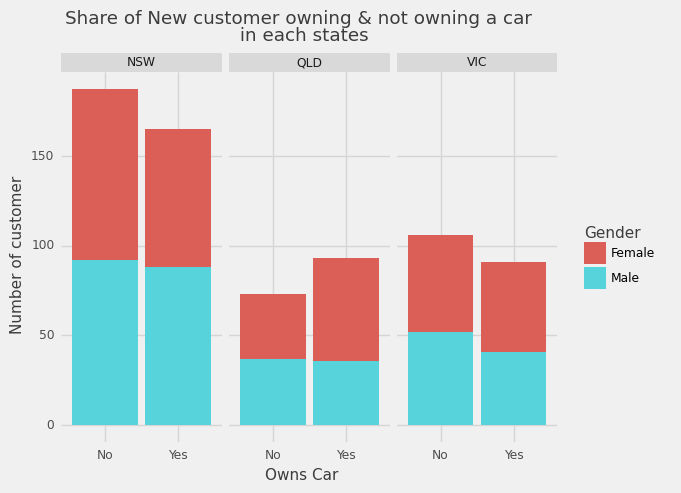

<ggplot: (-9223363276761920999)>

In [ ]:
ggplot(NewCustomerList, aes(x = 'owns_car', fill = 'gender'))+ \
  stat_count()+\
  facet_wrap('state')+\
  labs(x = 'Owns Car', y = 'Number of customer', title ='Share of New customer owning & not owning a car \n in each states')+ \
  scale_fill_discrete(name = 'Gender')+\
  theme_538()

/usr/local/lib/python3.6/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


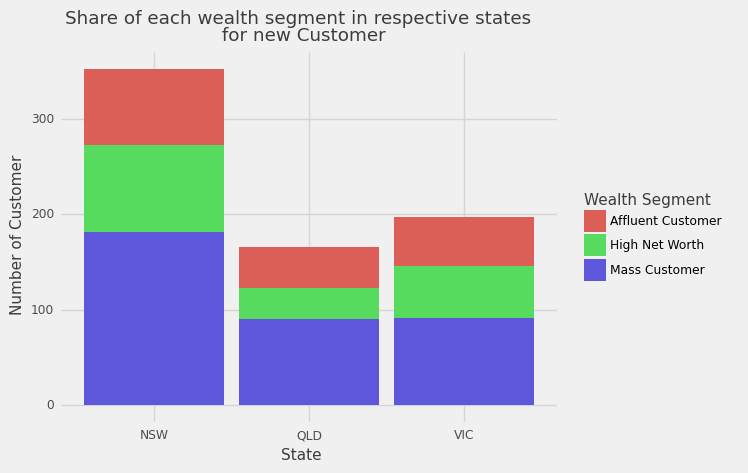

<ggplot: (-9223363276761920894)>

In [ ]:
ggplot(NewCustomerList, aes(x = 'state', fill = 'wealth_segment'))+ \
  stat_count()+ \
  labs(x = 'State', y = 'Number of Customer', title ='Share of each wealth segment in respective states \n for new Customer') +\
  scale_fill_discrete(name = 'Wealth Segment')+\
  theme_538()

### Extra Work (Not required for the internship)

In [ ]:
corr = Final_Data.corr() # Calculates correlation matrix

In [ ]:
corr.style.background_gradient(cmap='coolwarm') # This line plots nicely visualized matrix of correlation

,customer_id,Recency,product_id,Profit,R_Score,F_Score,M_Score,RFM_Value,Age,past_3_years_bike_related_purchases,property_valuation
customer_id,1.000000,0.023416,-0.042386,-0.007428,-0.014955,-0.046694,-0.005305,-0.031051,-0.009346,-0.015751,-0.006877
Recency,0.023416,1.000000,-0.206898,-0.088932,-0.838751,-0.209640,-0.067502,-0.516290,0.032249,0.023008,0.021605
product_id,-0.042386,-0.206898,1.000000,0.659739,0.180558,0.957920,0.622492,0.812933,0.013178,0.003246,-0.003371
Profit,-0.007428,-0.088932,0.659739,1.000000,0.088361,0.632202,0.933247,0.760587,-0.002703,0.020186,-0.011084
R_Score,-0.014955,-0.838751,0.180558,0.088361,1.000000,0.175128,0.069962,0.575959,-0.030123,-0.011308,-0.018416
F_Score,-0.046694,-0.209640,0.957920,0.632202,0.175128,1.000000,0.605267,0.822131,0.015281,-0.003220,0.004461
M_Score,-0.005305,-0.067502,0.622492,0.933247,0.069962,0.605267,1.000000,0.770002,0.011394,0.019351,-0.016188
RFM_Value,-0.031051,-0.516290,0.812933,0.760587,0.575959,0.822131,0.770002,1.000000,-0.001632,0.002099,-0.013830
Age,-0.009346,0.032249,0.013178,-0.002703,-0.030123,0.015281,0.011394,-0.001632,1.000000,-0.046139,0.007915
past_3_years_bike_related_purchases,-0.015751,0.023008,0.003246,0.020186,-0.011308,-0.003220,0.019351,0.002099,-0.046139,1.000000,0.018982


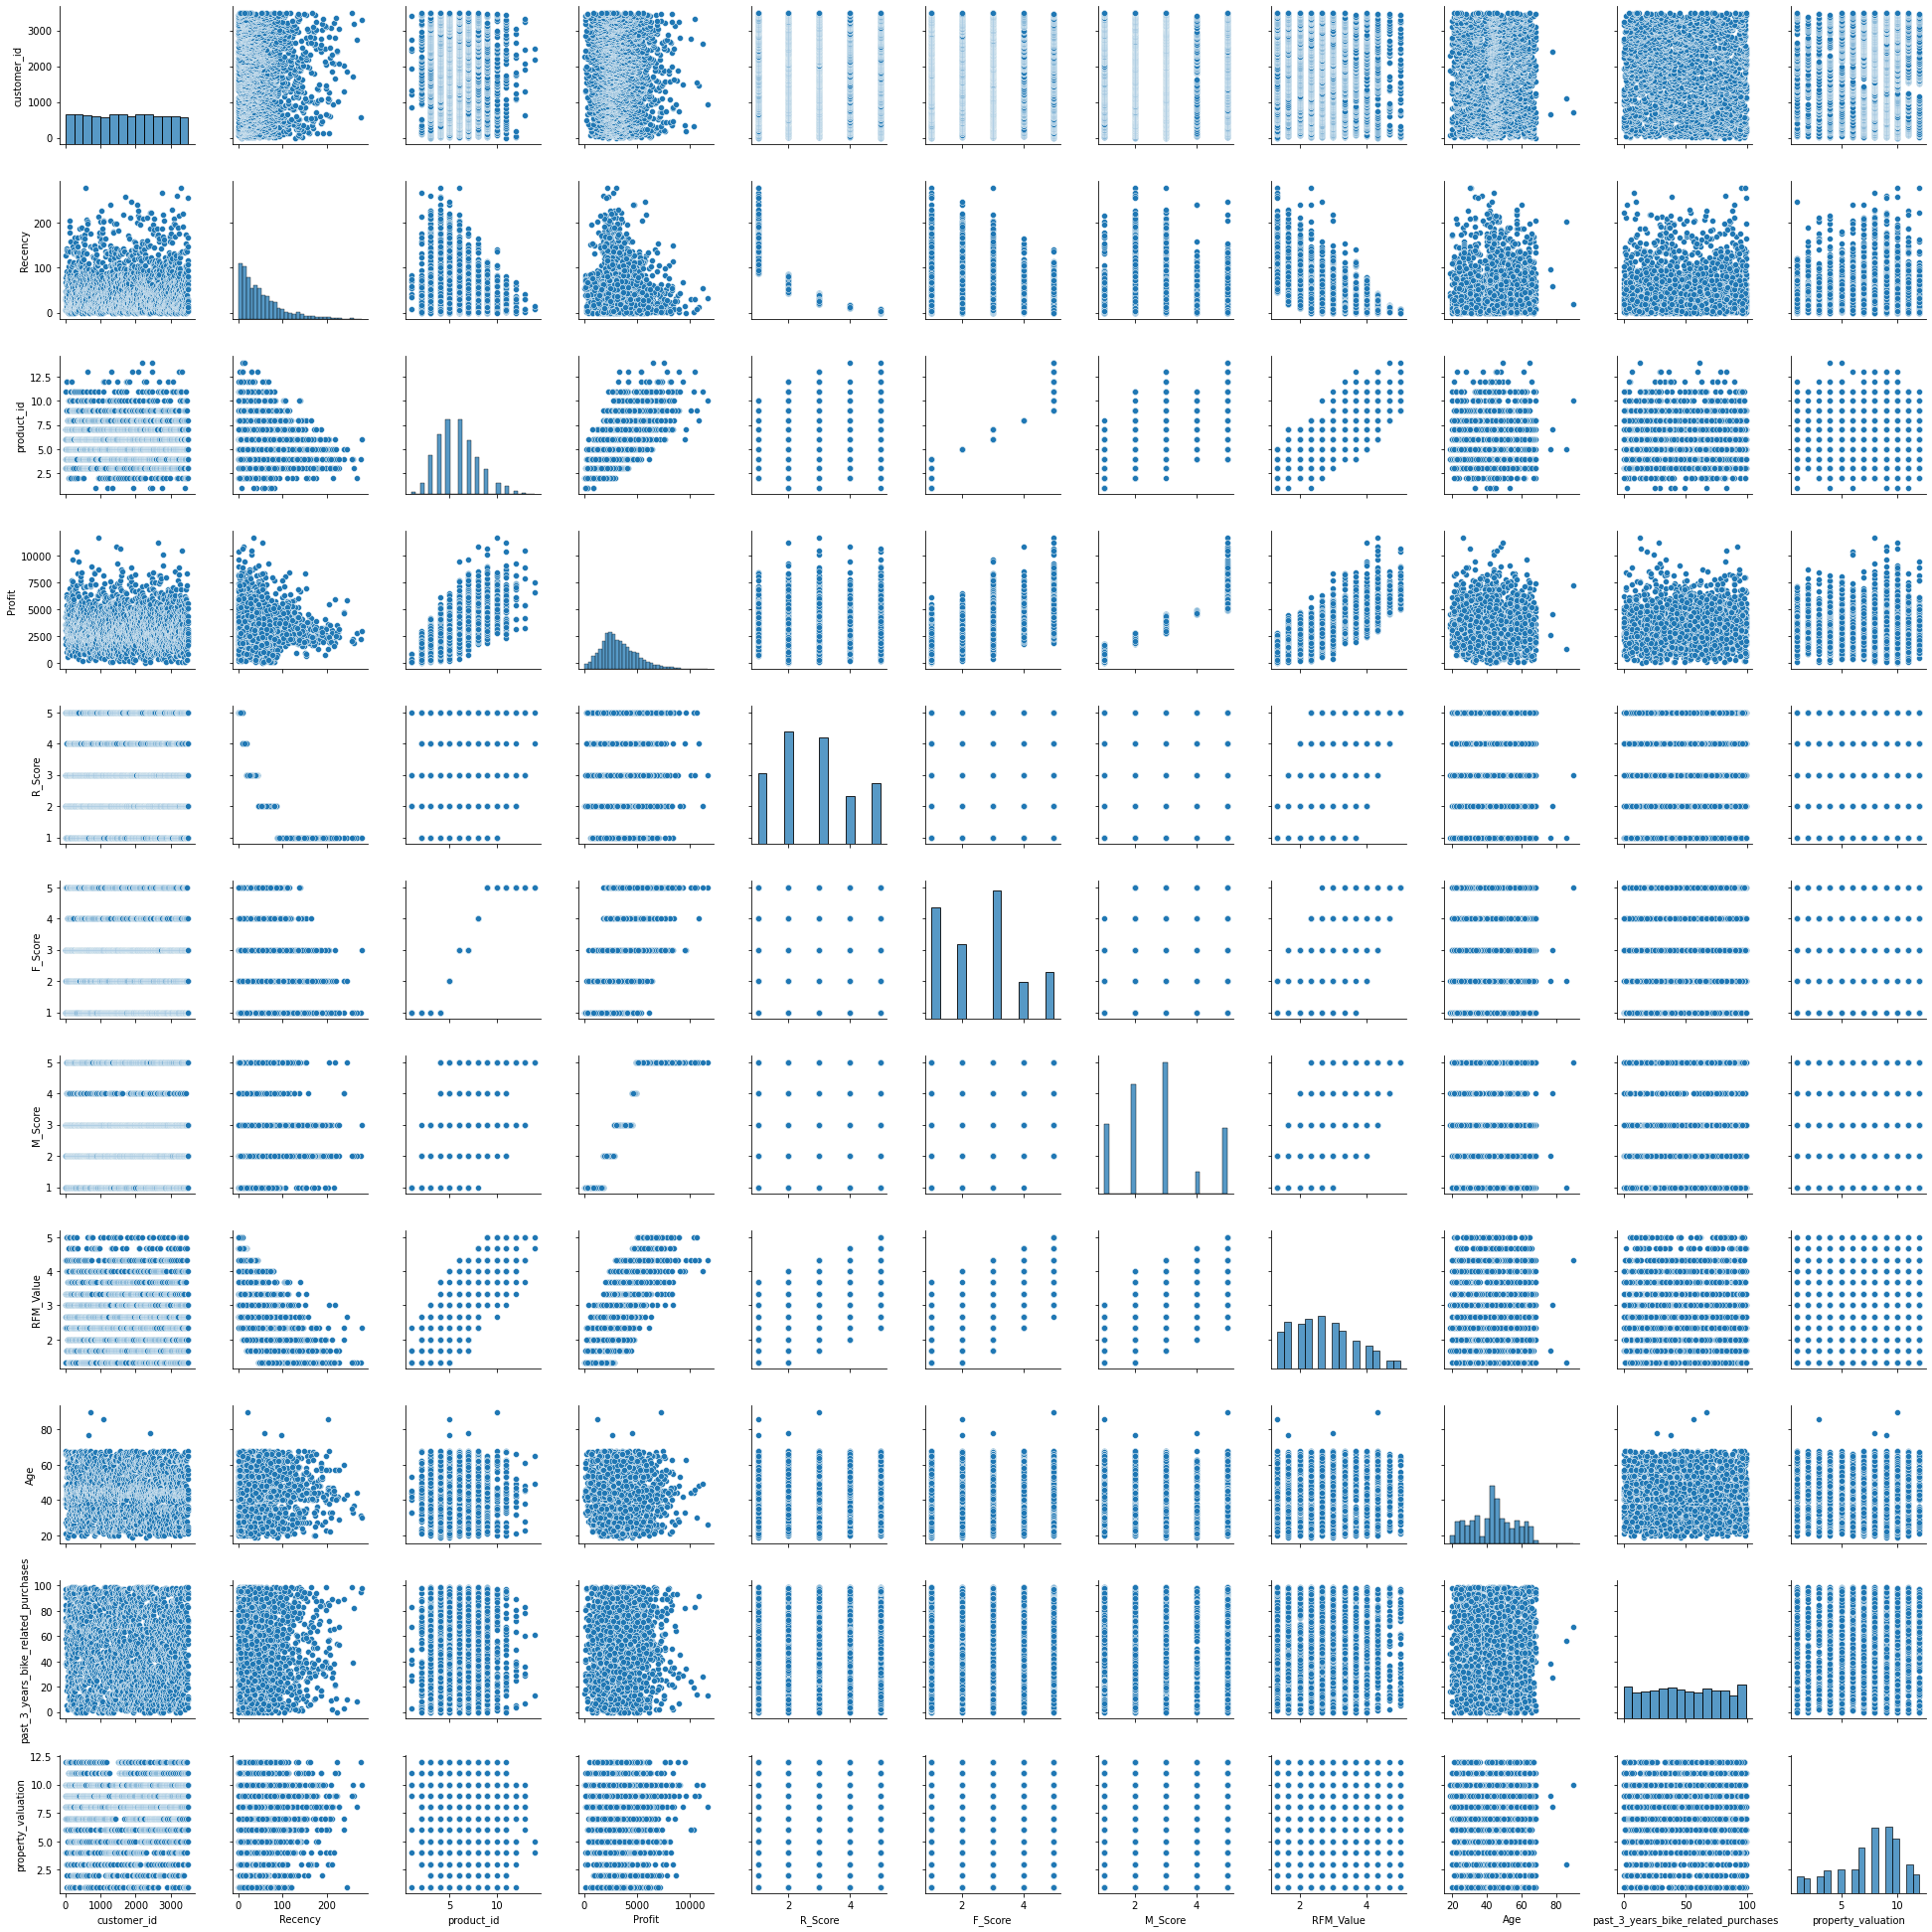

In [ ]:
sns.pairplot(Final_Data)

### Import Libraries

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier


In [ ]:
features = ['customer_id','Age','wealth_segment','gender','job_industry_category','owns_car','state','past_3_years_bike_related_purchases','property_valuation']

In [ ]:
X = Final_Data[features]
y = Final_Data.Customer_Title

In [ ]:
X.shape

(2224, 9)

In [ ]:
y.shape

(2224,)

In [ ]:
X = pd.get_dummies(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1668, 23)
(556, 23)
(1668,)
(556,)


In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.2392086330935252


In [ ]:
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.2823741007194245


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.29676258992805754


In [ ]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.24100719424460432


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(1024, activation='relu'))

model.add(Dense(512, activation='relu'))

model.add(Dense(256, activation = 'relu'))

model.add(Dense(128, activation = 'softmax'))

model.add(Dense(5, activation='softmax'))

In [ ]:
X = Final_Data[features]
y = Final_Data.Customer_Title

In [ ]:
X = pd.get_dummies(X)
y = pd.get_dummies(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
                   
model.fit(X_train, y_train,epochs=150, batch_size= 10, verbose=1)

Epoch 1/150
167/167 [==============================] - 2s 9ms/step - loss: 1.5736 - accuracy: 0.3539
Epoch 2/150
167/167 [==============================] - 2s 9ms/step - loss: 1.5163 - accuracy: 0.3931
Epoch 3/150
167/167 [==============================] - 2s 9ms/step - loss: 1.4998 - accuracy: 0.3903
Epoch 4/150
167/167 [==============================] - 2s 9ms/step - loss: 1.4944 - accuracy: 0.3823
Epoch 5/150
167/167 [==============================] - 1s 9ms/step - loss: 1.4847 - accuracy: 0.3929
Epoch 6/150
167/167 [==============================] - 1s 9ms/step - loss: 1.4899 - accuracy: 0.3808
Epoch 7/150
167/167 [==============================] - 1s 9ms/step - loss: 1.4934 - accuracy: 0.3759
Epoch 8/150
167/167 [==============================] - 2s 9ms/step - loss: 1.4869 - accuracy: 0.3883
Epoch 9/150
167/167 [==============================] - 1s 9ms/step - loss: 1.4953 - accuracy: 0.3751
Epoch 10/150
167/167 [==============================] - 2s 9ms/step - loss: 1.4859 - accura

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              24576     
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 645       
Total params: 714,245
Trainable params: 714,245
Non-trainable params: 0
_________________________________________________________________


### Task 3: Data insights and Presentation. 

Prepare the data for the Tableau Dashboard


In [ ]:
Final_Data.head()

,customer_id,Recency,product_id,Profit,R_Score,F_Score,M_Score,RFM_Value,Customer_Title,Age,wealth_segment,gender,job_industry_category,owns_car,state,past_3_years_bike_related_purchases,property_valuation
0,1,7,11,3018.09,5.0,5.0,3.0,4.333333,Champion,68,Mass Customer,Female,Health,Yes,New South Wales,93,10
1,2,128,3,2226.26,1.0,1.0,2.0,1.333333,Can't lose them!!,41,Mass Customer,Male,Financial Services,Yes,New South Wales,81,10
2,9,78,6,2353.11,2.0,3.0,2.0,2.333333,At risk of losing,48,Affluent Customer,Female,Argiculture,Yes,New South Wales,97,12
3,12,67,7,3540.03,2.0,3.0,3.0,2.666667,At risk of losing,27,Mass Customer,Male,Manufacturing,No,Queensland,58,4
4,13,27,7,4337.38,3.0,3.0,3.0,3.000000,Probably New Customer,66,High Net Worth,Male,Financial Services,Yes,Victoria,38,6


In [ ]:
Final_Data.to_excel("RMF_Score.xlsx", 
                    sheet_name ='RMF_Score')

In [ ]:
type(Final_Data)

pandas.core.frame.DataFrame